#*KIBAR-AI: Kenali Isyarat, Braille Automatik Segera Respons [Part II]*

Note: *Merely schema of the project*


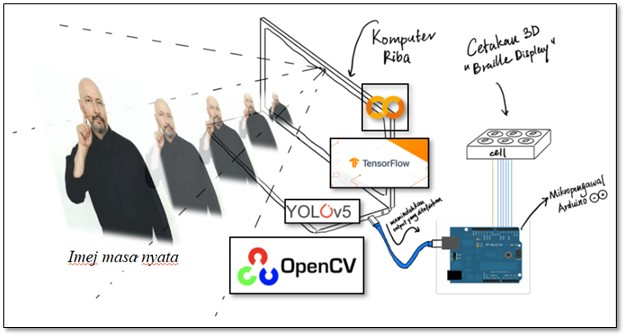

---

> Customised Object Detection Model incorporating Pre-trained YOLOv11 (You Only Look Once) which is a DL/Neural Network(CNN) - integrated, whose purpose is life is to accurately recognise and detect the hand gestures and patterns of Sign Language. Label of the detected pattern will be posted as signal that is to be interpreted at the Arduino's site, technically demonstrated by the Braille Board.

In [ ]:
!nvidia-smi

Sat Dec 28 04:56:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###1. Installing Ultralytic Package (Pytorch)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 20.5 MB/s eta 0:00:00


### 2. Import Required Dependencies

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


###3. Download the dataset prepared from Part I from Google Drive



```
Precautionay Guidelines:
1. Go to your Google Drive and locate the file "sign_datasets.zip".
2. Right-click on the file and select "Share".
3. In the sharing settings, change the "General access" to "Anyone with the link".
4. Click "Done".
```





In [ ]:
import gdown

url = "https://drive.google.com/file/d/10nv1ncZ8tT58_0ToIPvcKRgrzTcDzxRY/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_datasets.zip")

10nv1ncZ8tT58_0ToIPvcKRgrzTcDzxRY


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=10nv1ncZ8tT58_0ToIPvcKRgrzTcDzxRY
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=10nv1ncZ8tT58_0ToIPvcKRgrzTcDzxRY&confirm=t&uuid=e8674fdb-5058-44cb-8f74-5f918605c072
To: /content/sign_datasets.zip
100%|██████████| 28.3M/28.3M [00:00<00:00, 105MB/s] 


'sign_datasets.zip'

In [ ]:
!unzip sign_datasets.zip

Archive:  sign_datasets.zip
 extracting: data.yaml               
 extracting: train/labels/V_82c99e7c-c2d5-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/W_2045e778-c2d6-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/A_dbdff510-c2a8-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/M_3bbcd862-c2be-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/W_111bb8cc-c2d6-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/Z_606c7fcc-c2d8-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/C_509c25a8-c2aa-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/F_97895e2e-c2b7-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/W_2bf1bb2e-c2d6-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/Hello.94d76664-a6d1-11ec-a96e-84a93ea18ae6.txt  
 extracting: train/labels/E_101e29c4-c2b7-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/N_3841b72c-c2c1-11ef-87f0-0242ac1c000c.txt  
 extracting: train/labels/A_c0eb55ba-c2a8-11ef-87f0-0242ac1c000c.txt  
 extrac

###4. Train YOLO11 Model on a Customised Dataset

In [ ]:
!yolo task=detect mode=train data="/content/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 84.4MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

In [ ]:
import zipfile
import os
from google.colab import files

def zip_and_download(input_folder_path, output_zip_path):
    """
    Zips the contents of a folder and downloads the resulting ZIP file.

    Parameters:
    - input_folder_path: Path to the folder to be zipped.
    - output_zip_path: Path to save the ZIP file.
    """
    with zipfile.ZipFile(output_zip_path, 'w') as zipf:
        for root, dirs, files_in_dir in os.walk(input_folder_path):
            for file in files_in_dir:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, input_folder_path)  # Relative path for correct folder structure in ZIP
                zipf.write(file_path, arcname)
    files.download(output_zip_path)

In [ ]:
zip_and_download('/content/runs', 'training_output.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###5.  Examine Training Results

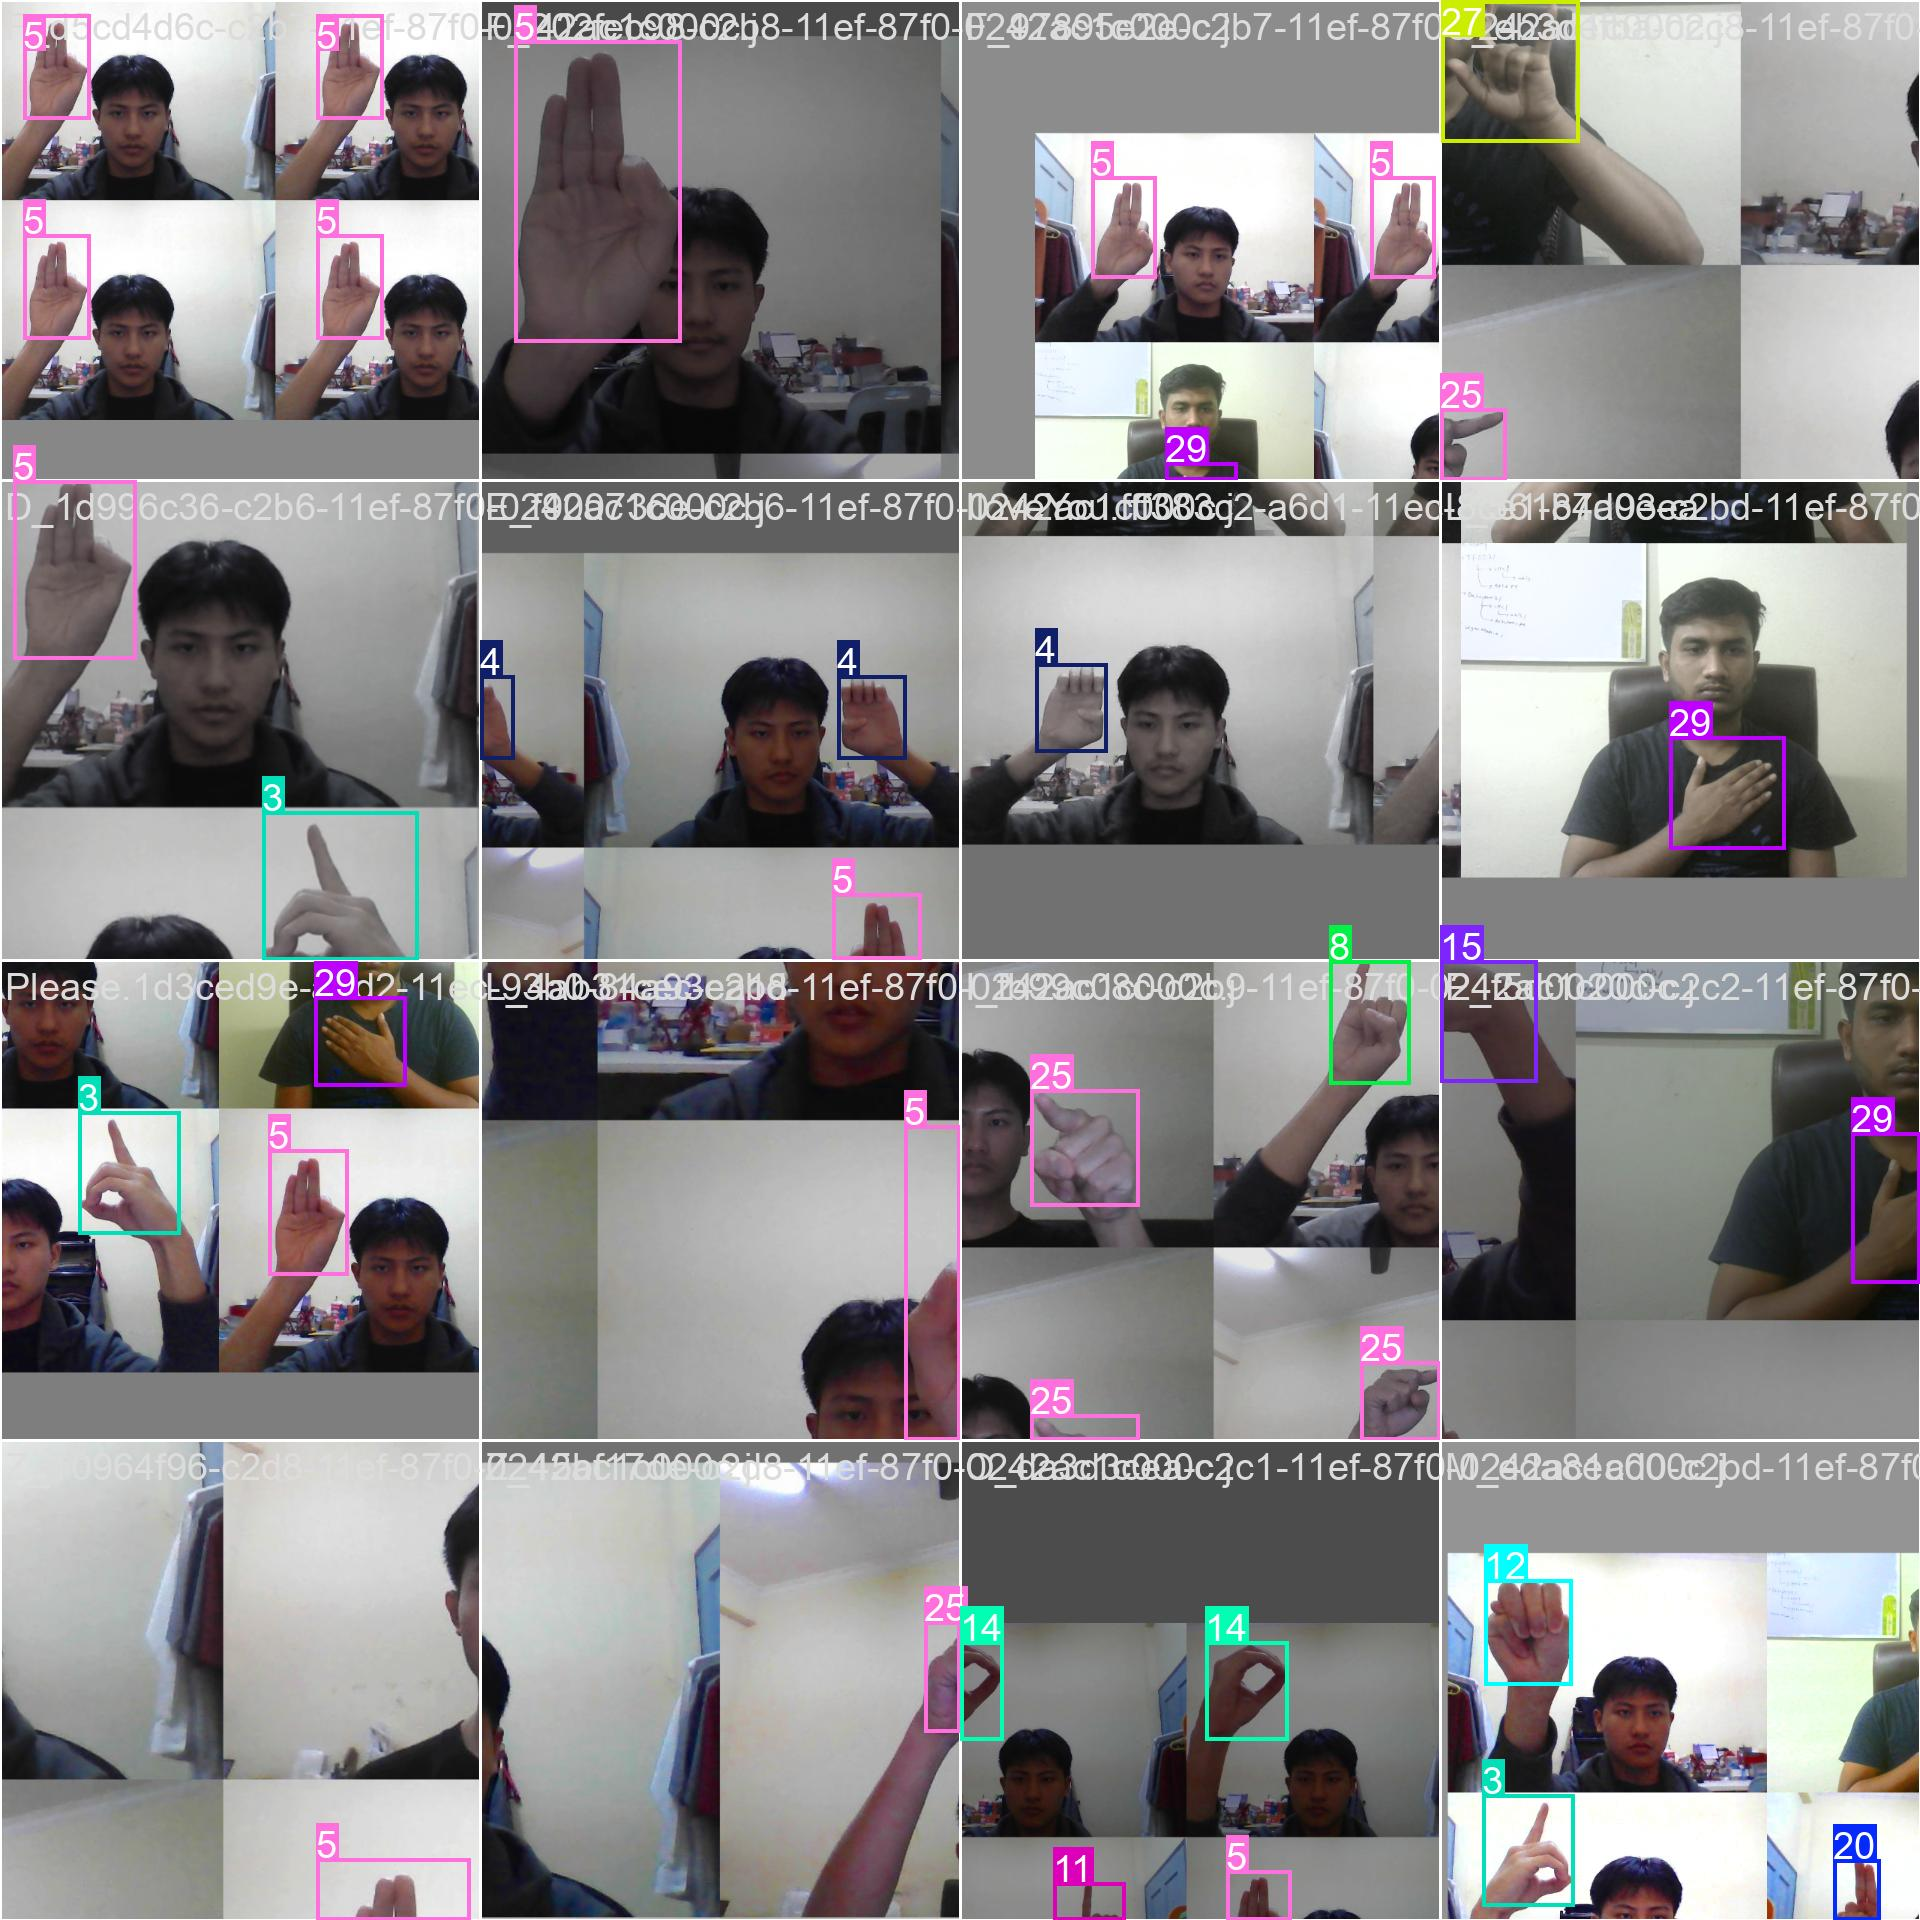

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

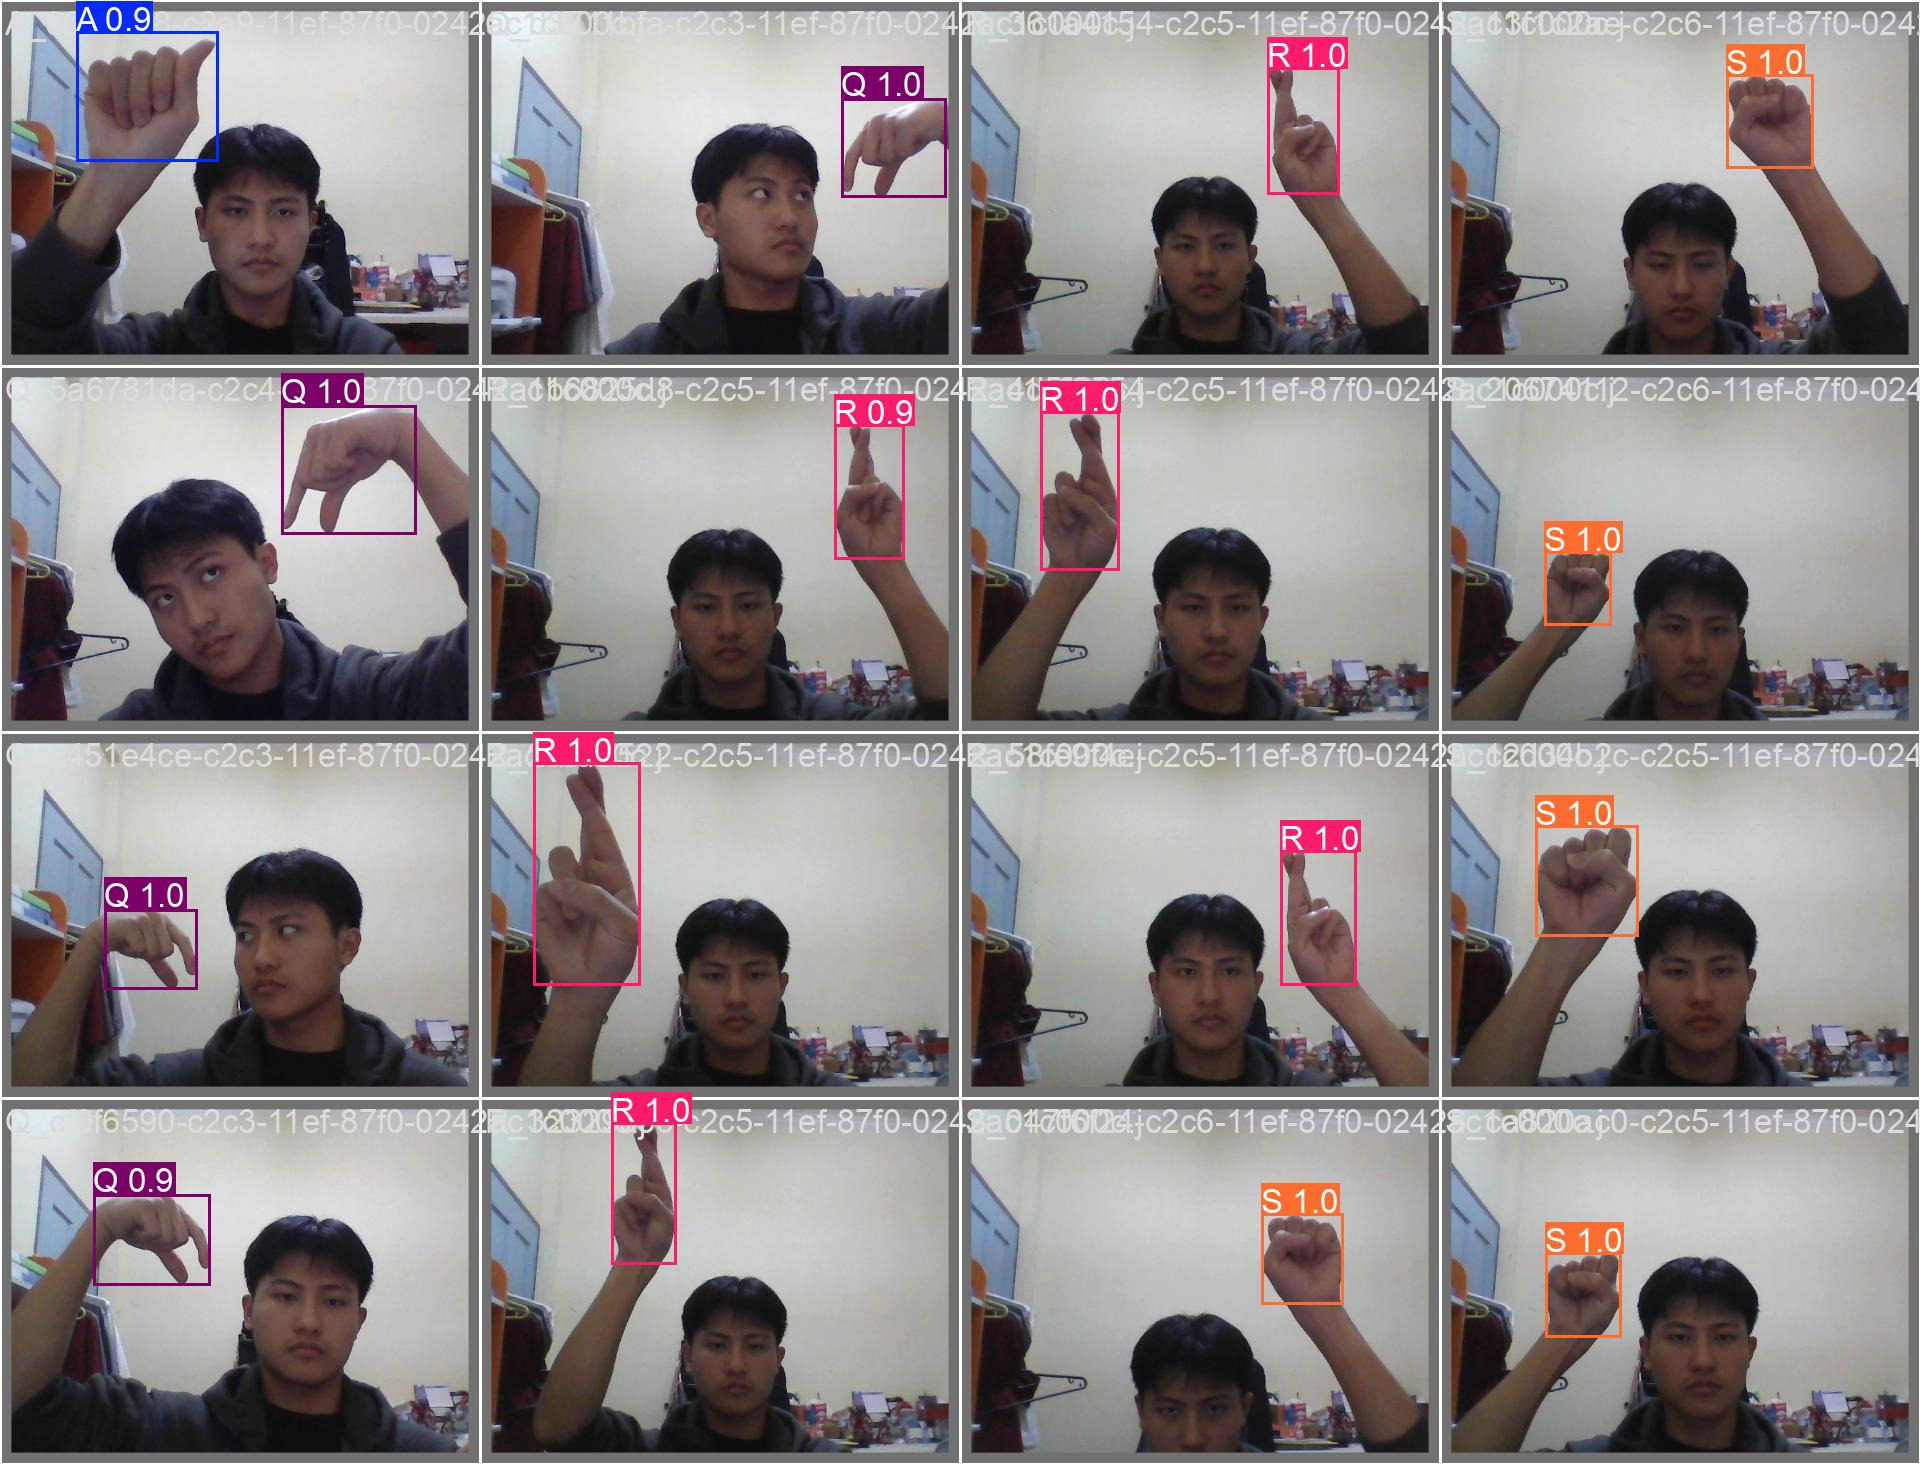

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

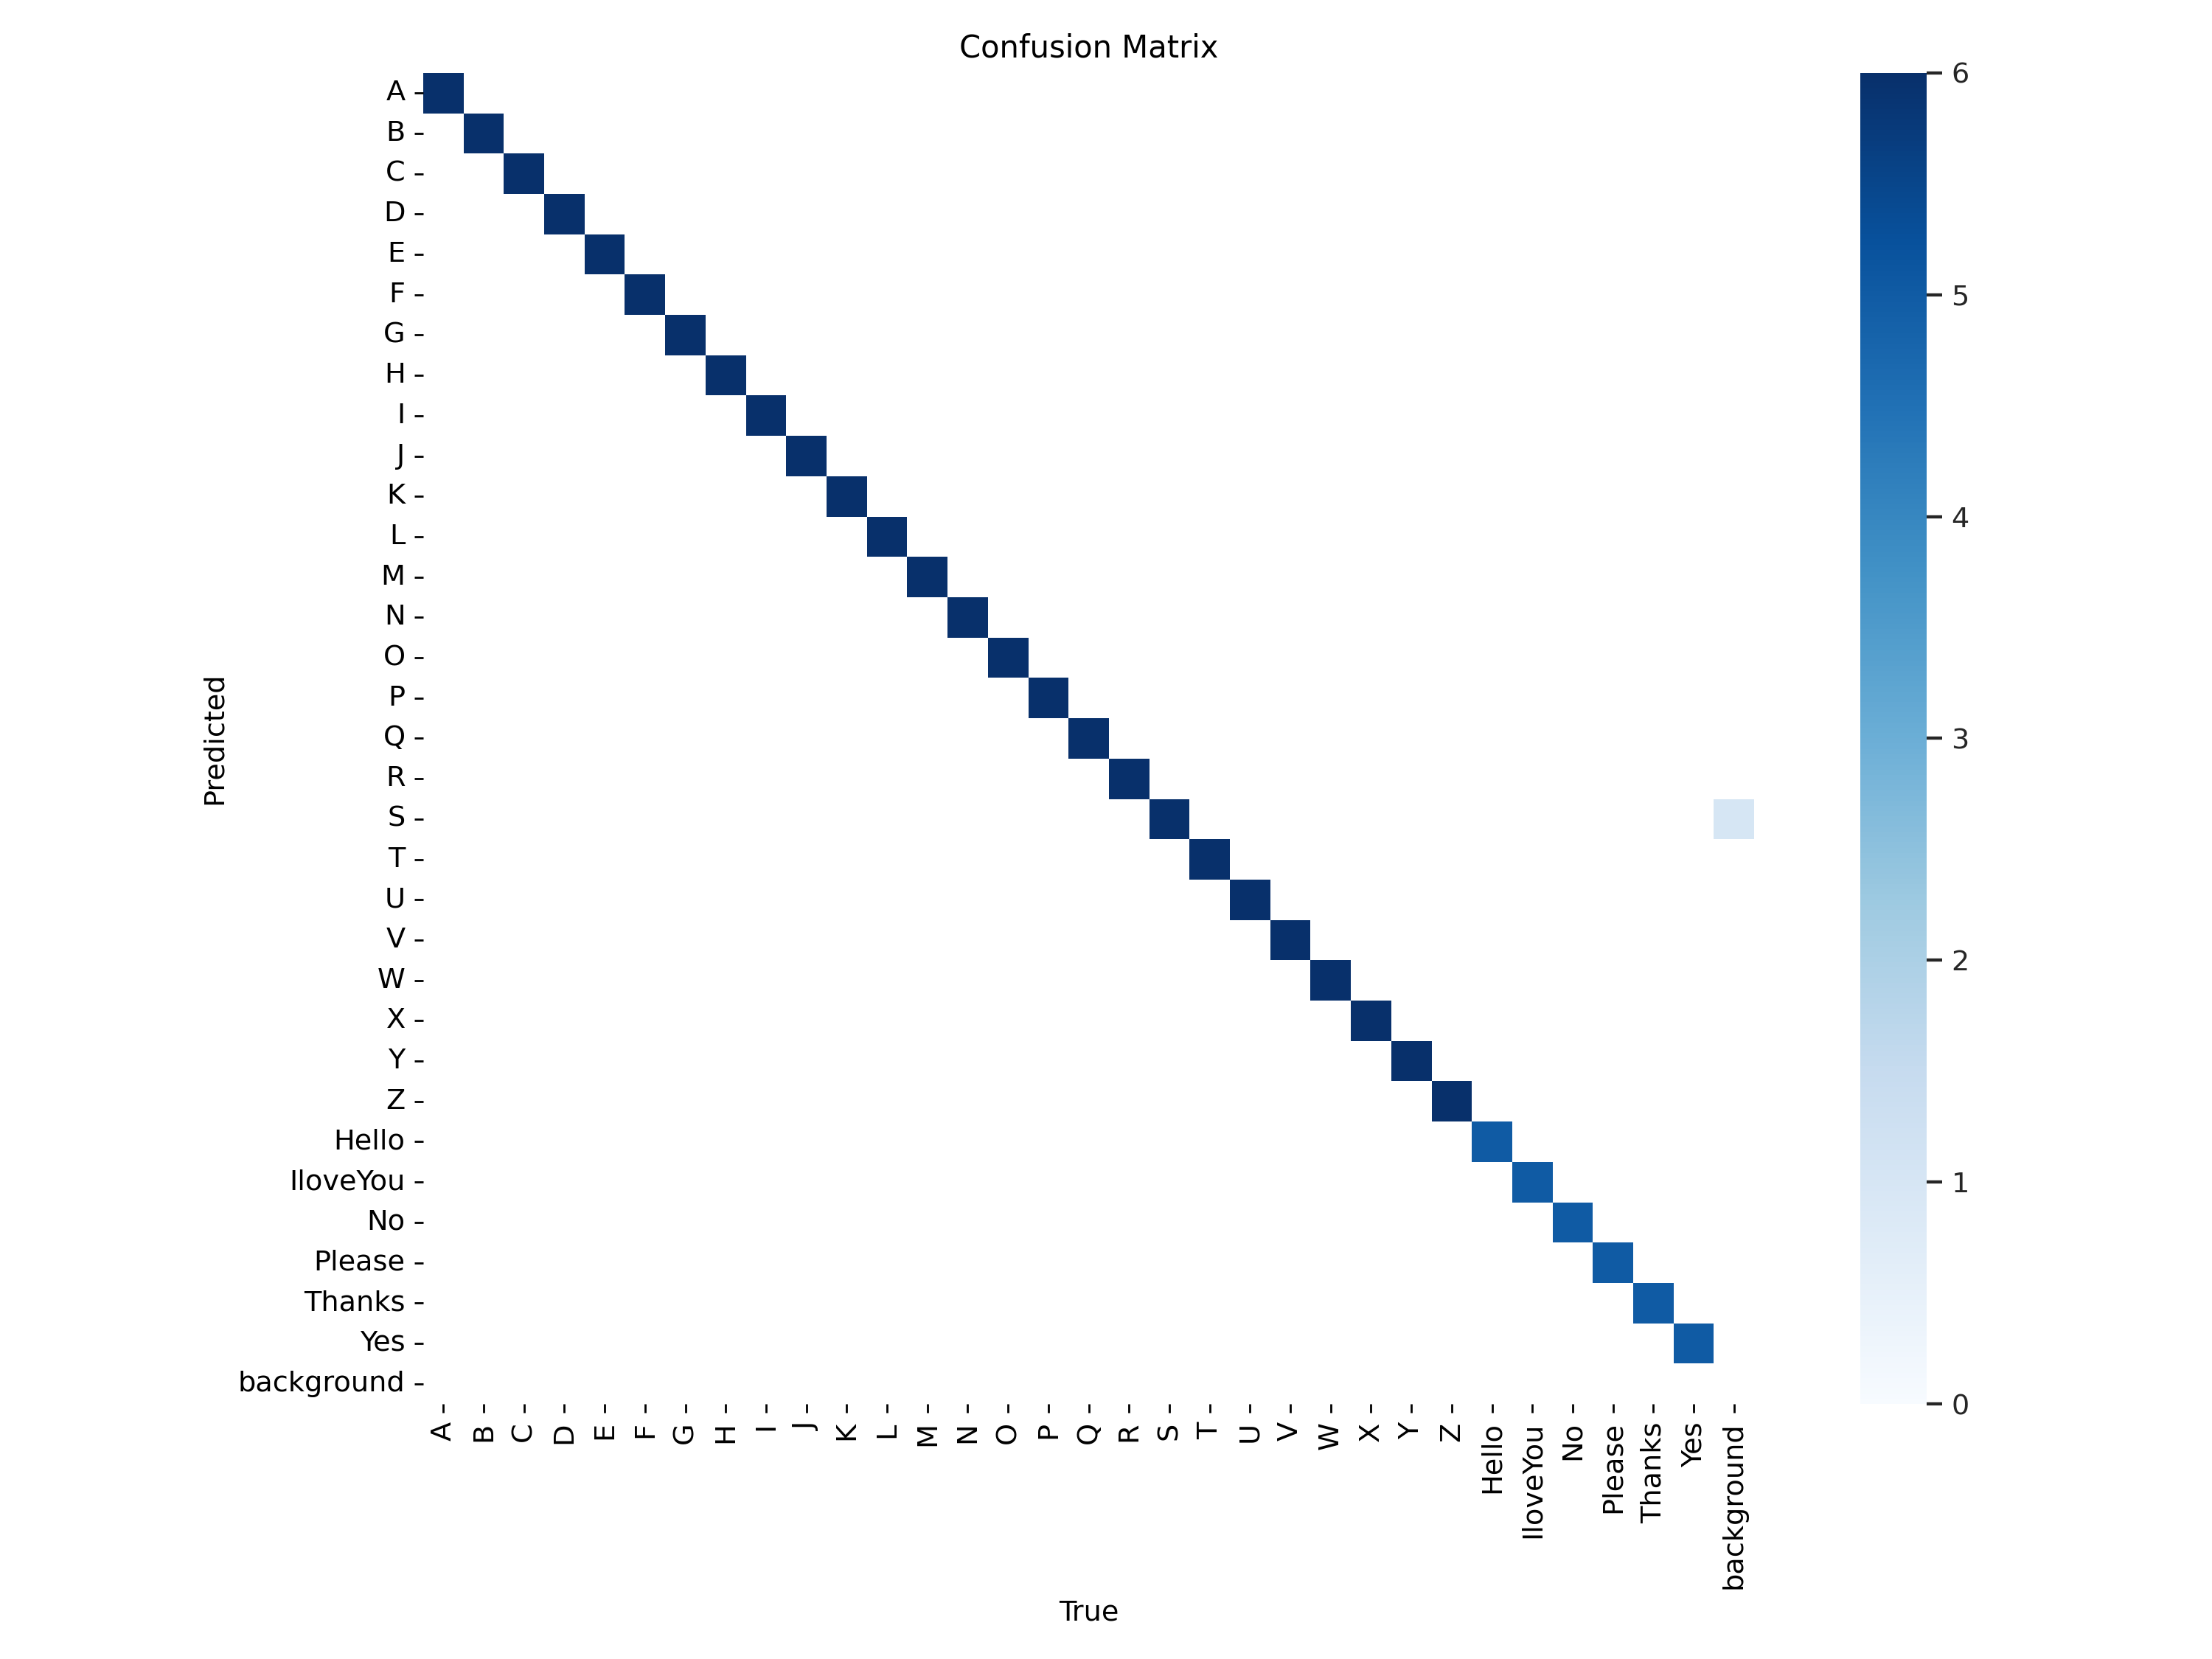

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

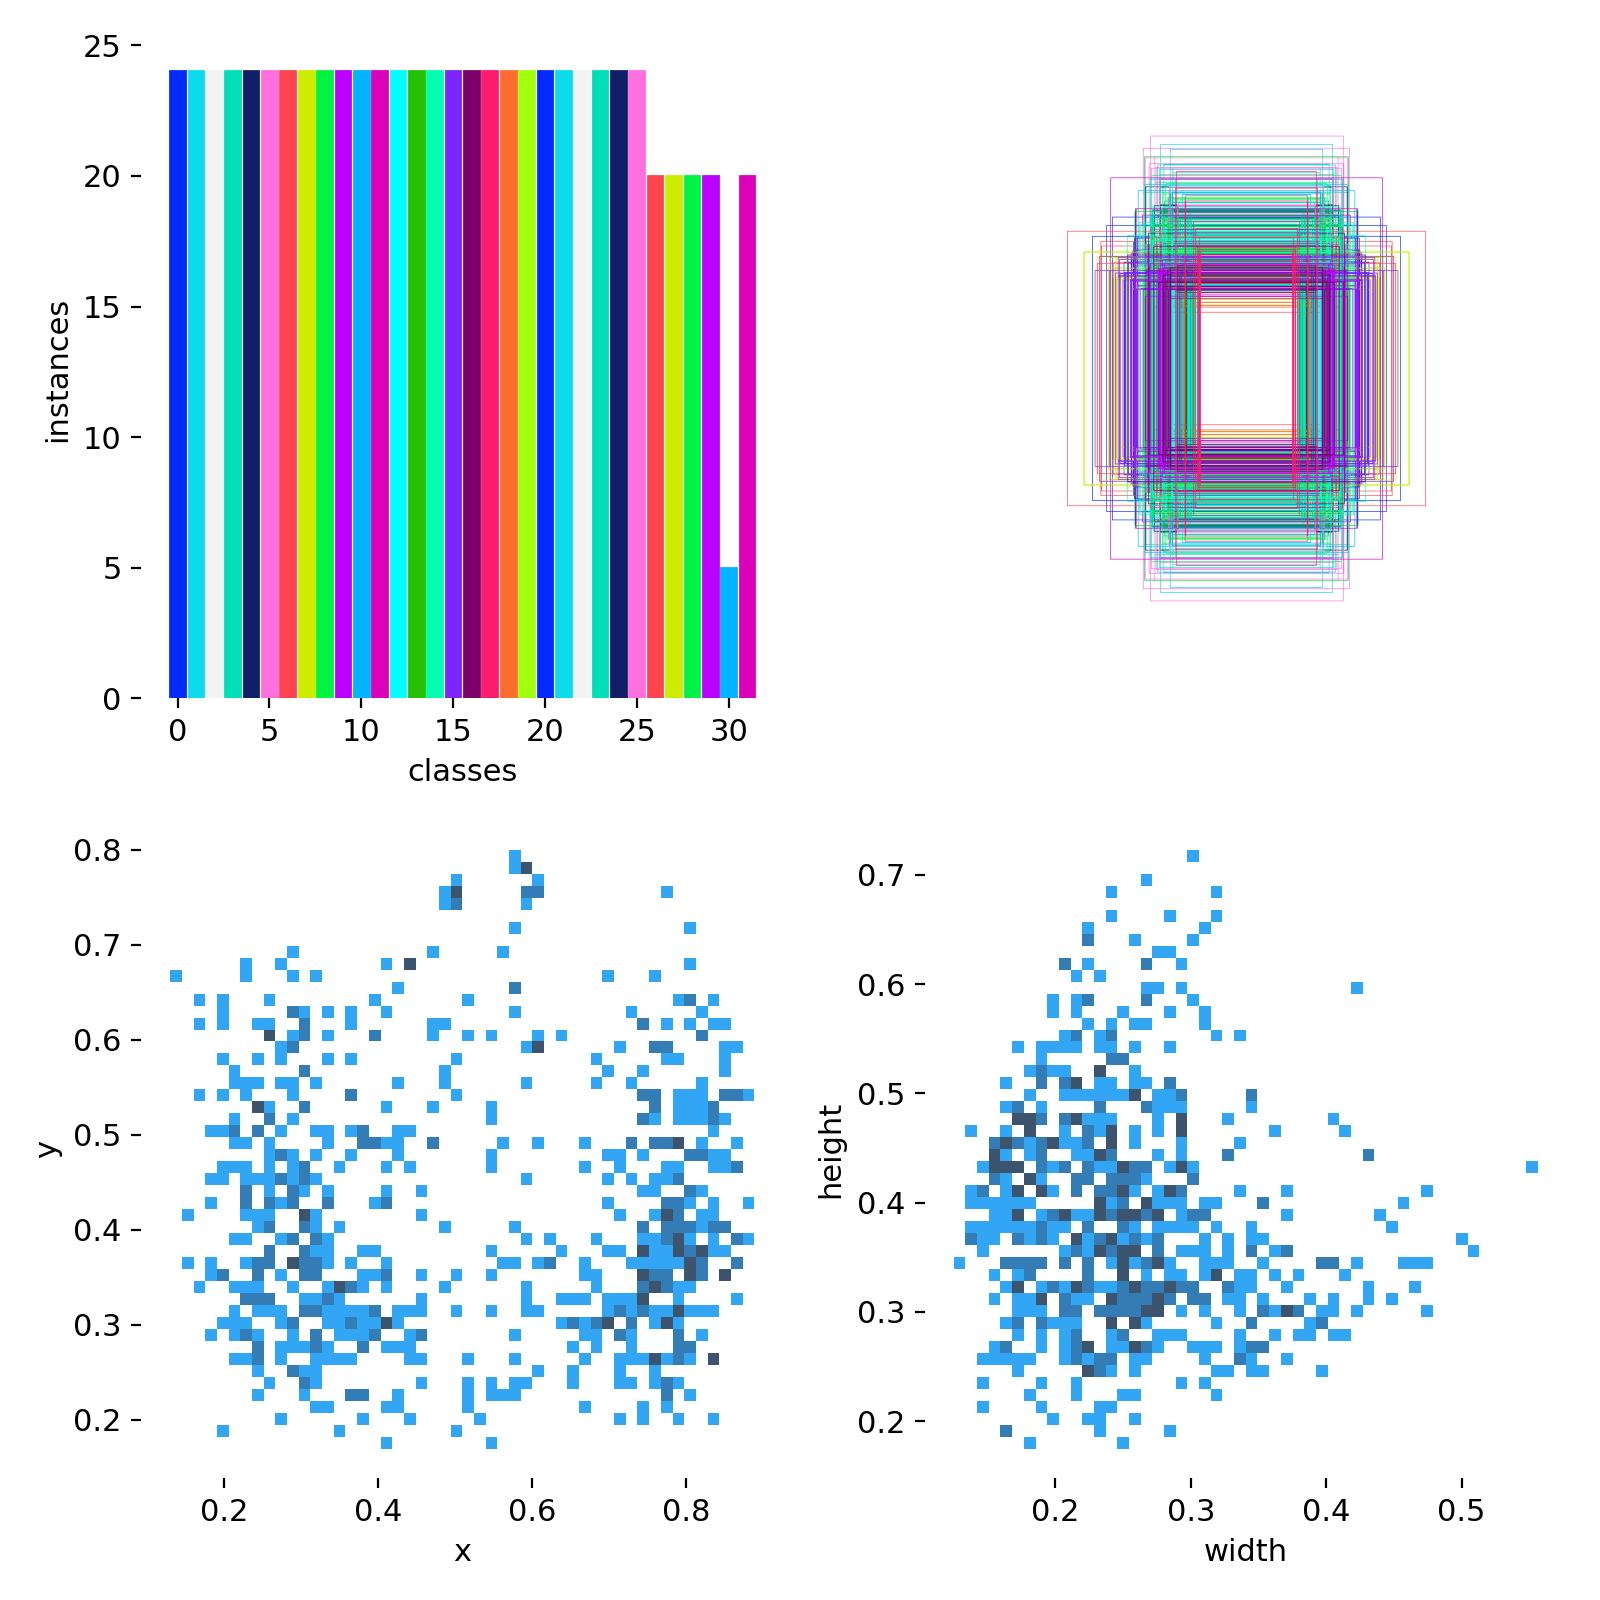

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

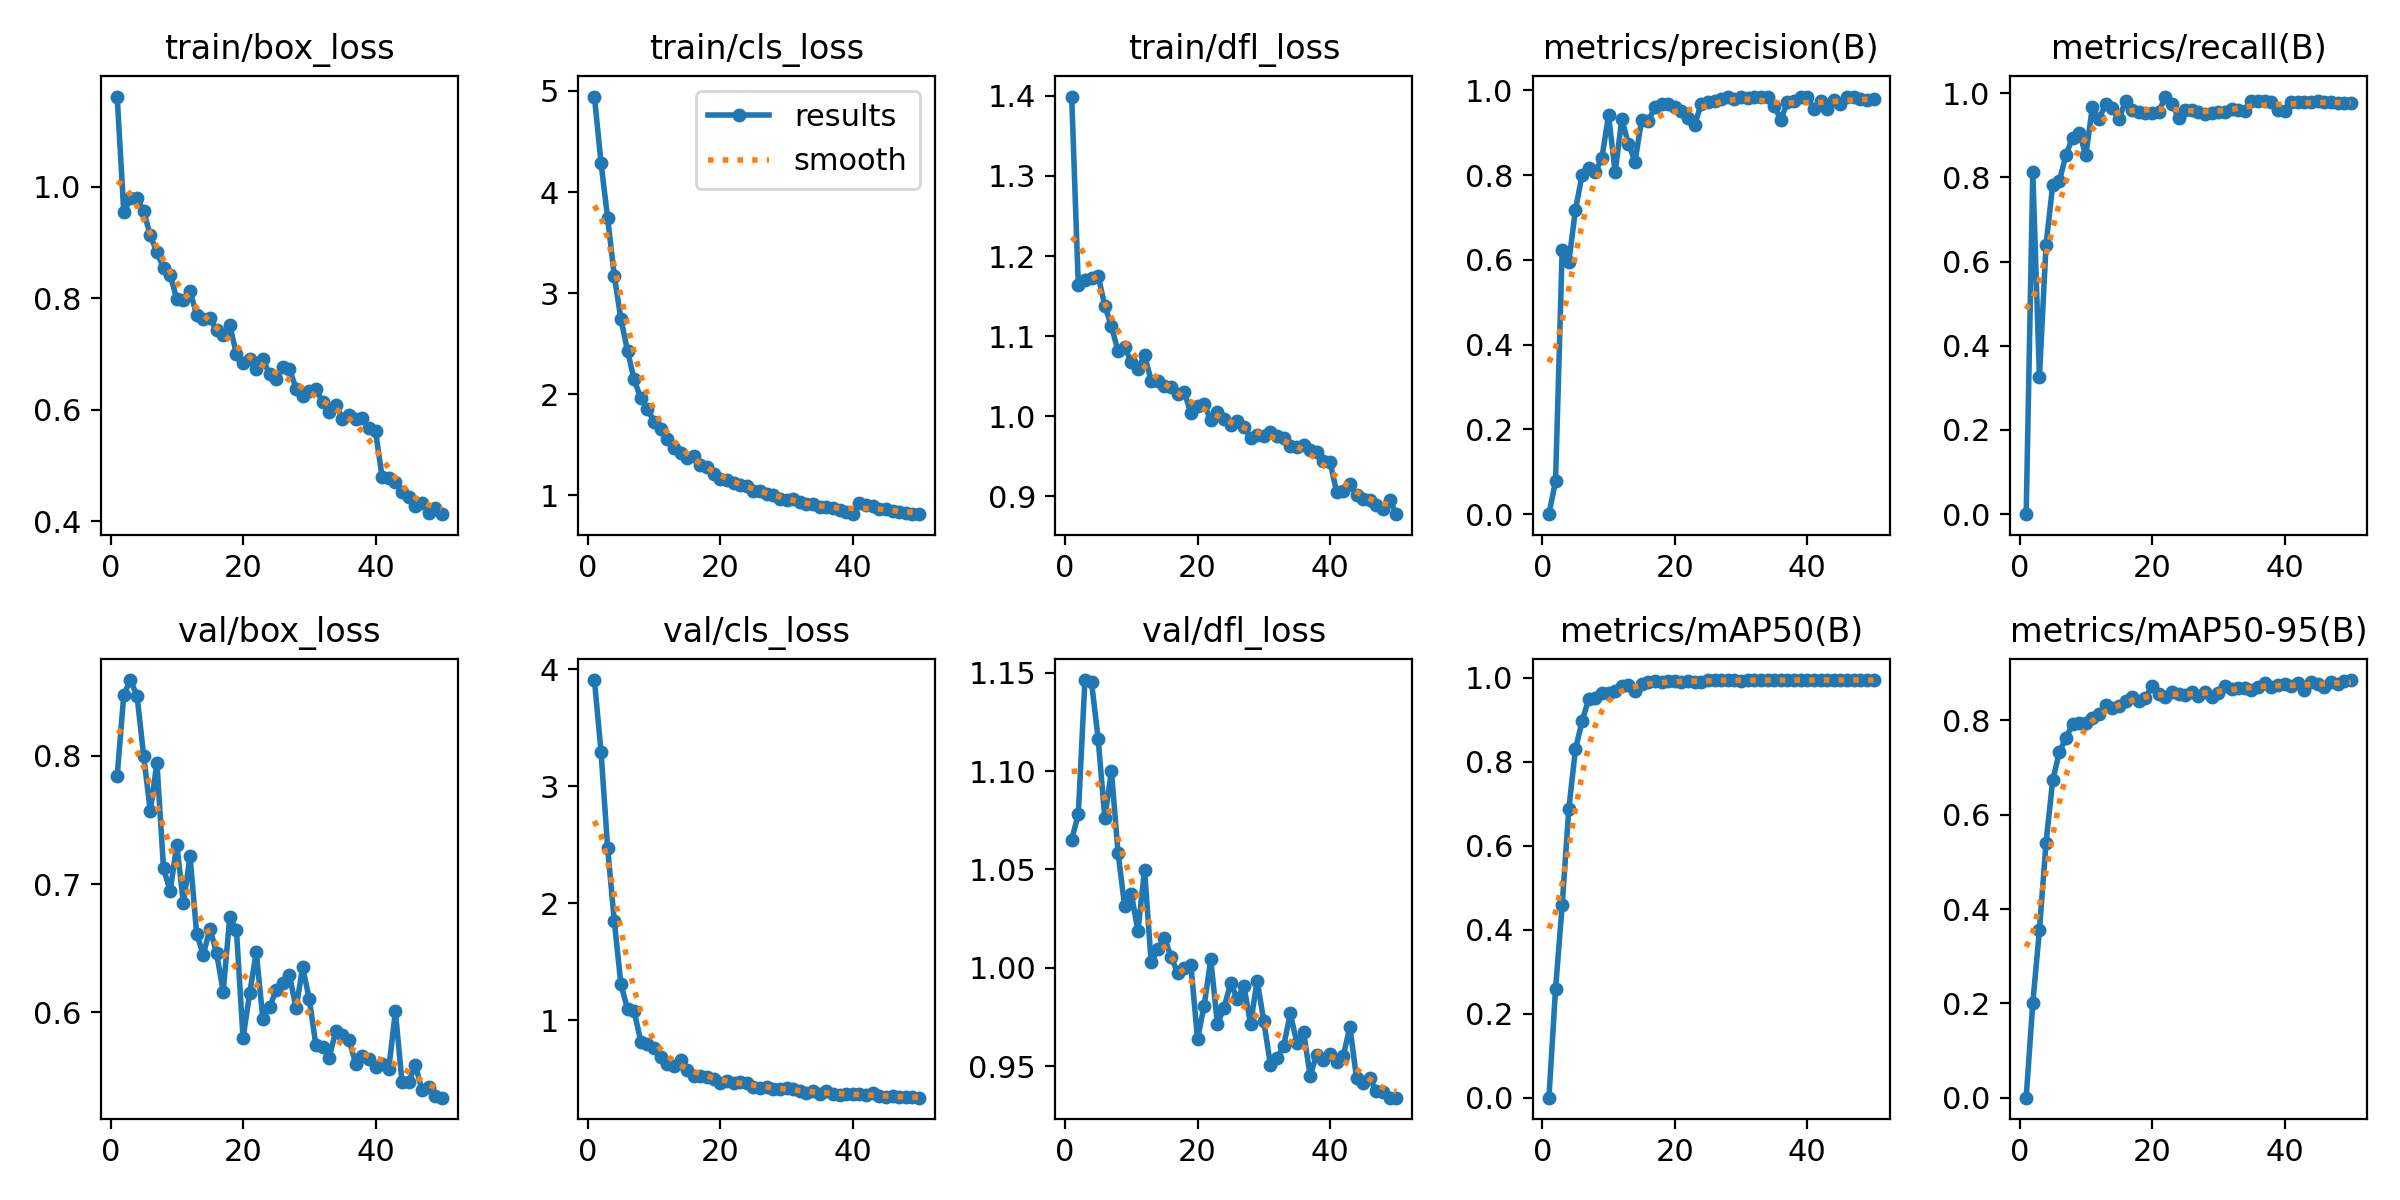

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

###6. Inference with Custom Model on Images

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/test/images" save=True

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,588,392 parameters, 0 gradients, 6.3 GFLOPs

image 1/186 /content/test/images/A_09ffa8c8-c2a9-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 47.8ms
image 2/186 /content/test/images/A_0dc3dde4-c2a9-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 9.1ms
image 3/186 /content/test/images/A_b9055d8c-c2a8-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 16.1ms
image 4/186 /content/test/images/A_d0434fe0-c2a8-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 9.1ms
image 5/186 /content/test/images/A_d81953d6-c2a8-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 9.6ms
image 6/186 /content/test/images/A_dfb4ba4a-c2a8-11ef-87f0-0242ac1c000c.jpg: 480x640 1 A, 9.1ms
image 7/186 /content/test/images/B_48443158-c2a9-11ef-87f0-0242ac1c000c.jpg: 480x640 1 B, 9.0ms
image 8/186 /content/test/images/B_4ff332dc-c2a9-11ef-87f0-0242ac1c000c.jpg: 480x640 1 B, 8.9ms
image 9/186 /content/test/images/B_5f57da7a-c2a9-11ef-87f0-0242a

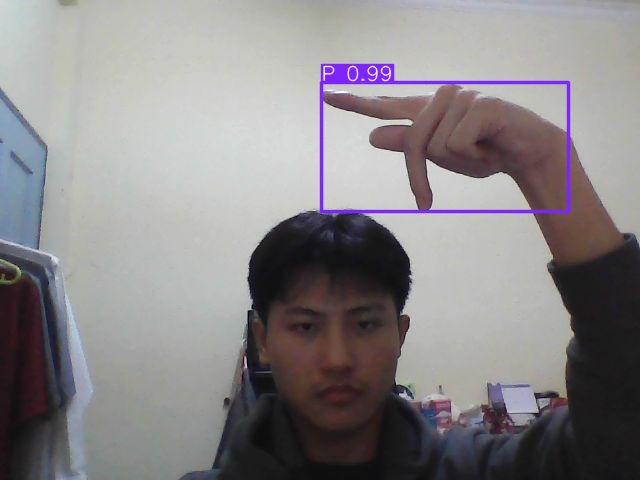

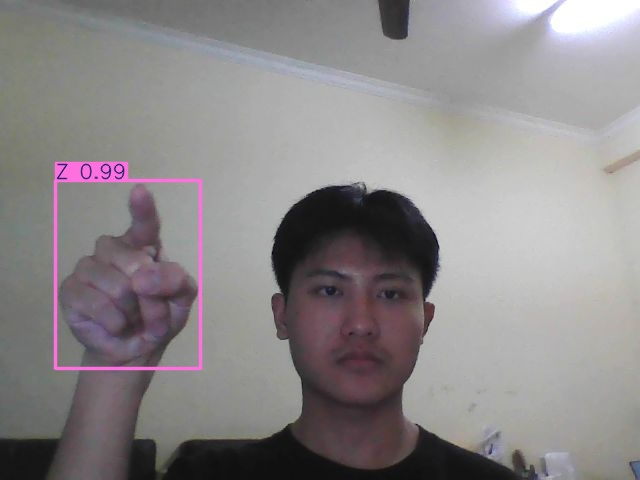

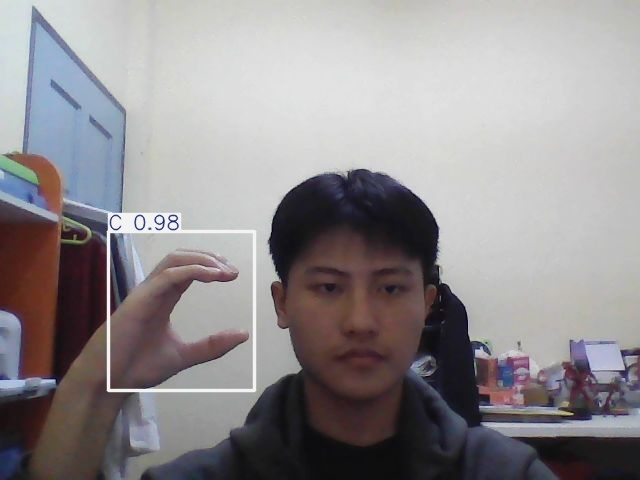

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/train/images/L_f8e1a6b8-c2bc-11ef-87f0-0242ac1c000c.jpg" save=True

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,588,392 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/train/images/L_f8e1a6b8-c2bc-11ef-87f0-0242ac1c000c.jpg: 480x640 1 L, 51.2ms
Speed: 2.3ms preprocess, 51.2ms inference, 600.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


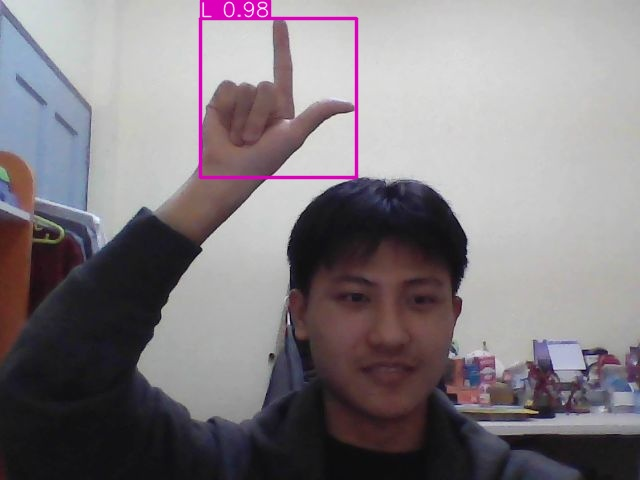

In [ ]:
Image("/content/runs/detect/predict2/L_f8e1a6b8-c2bc-11ef-87f0-0242ac1c000c.jpg", width=600)

###7. Save the model

```
To download the .pt file straightforwardly into local hardrive:

Through Python:
def zip_and_download(input_folder_path, output_zip_path):
    with zipfile.ZipFile(output_zip_path, 'w') as zipf:
        for root, dirs, files_in_dir in os.walk(input_folder_path):
            for file in files_in_dir:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, input_folder_path)  # Relative path for correct folder structure in ZIP
                zipf.write(file_path, arcname)
    files.download(output_zip_path)

or

Click "info" > "download"
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to the trained YOLOv11 model
trained_model_path = "/content/detect/train/weights/best.pt"  # Update with your actual file path

# Destination folder in Google Drive
drive_save_path = "/content/drive/My Drive/Custom_YOLOv11"  # Customize the folder name and structure


In [ ]:
import shutil

# Copy the model to Google Drive
shutil.copy(trained_model_path, drive_save_path)

print(f"Model saved to: {drive_save_path}")

Model saved to: /content/drive/My Drive/Yolo_Models
